# Regresjon med Python

Du har kanskje tidligere gjort regresjoner med GeoGebra. Det vil si at du for eksempel har funnet en linje (eller annen type graf) som passer «best» med ulike punkt i koordinatsystemet. Slike regresjoner kan vi også gjøre med Python. 

Vi skal se på to måter å gjøre dette på. Den ene er å bruke nympy sin polyfit-funksjon. Den andre metoden er å bruke scipy.optimize sin curve_fit-funksjon. 

## numpy sin polyfit

### Eksempel 1

Fem personer har gjennomført en såkalt makspulstest. Resultatet ser du i tabellen nedenfor. 

| Alder    |  17 |  25 |  37 |  48 |  60 |
|----------|----:|----:|----:|----:|----:|
| Makspuls | 195 | 189 | 183 | 175 | 166 |

Finn en lineær sammenheng mellom alder ($x$) og makspuls ($y$). 

**Løsning**

In [2]:
import numpy as np
x = [17, 25, 37, 48, 60]
y = [195, 189, 183, 175, 166]
L = np.polyfit(x, y, 1)
print(L)

[ -0.6605766  206.30556487]


Her får vi en liste som svar på oppgaven. Tallene i denne listen er koeffisienten til den linære funksjonen 

$$y=ax+b$$

Det vil si at

$$
\begin{align*}
 a&=-0.6605766 \\
 b&=206.30556487    
\end{align*}
$$

Vi ønsker å plotte dataene fra tabellen sammen med grafen til den lineære funksjonen. 

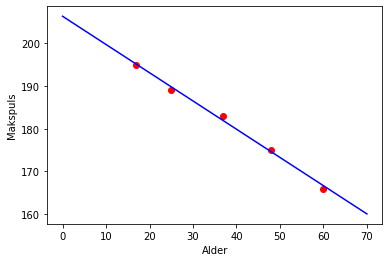

In [3]:
import matplotlib.pyplot as plt

def f(x):
    return L[0]*x + L[1]  # den lineære modellen

X = np.linspace(0, 70, 20) # x-verdier (trenger egenlit bare to stk... ) 

# Først spredningsplottet (punktene fra tabellen):

plt.scatter(x, y, color='red')

# Så den lineære modellen:
plt.plot(X, f(X), color='blue')

plt.xlabel("Alder")
plt.ylabel("Makspuls")

plt.show()


### Oppgave 1


Tabellen ovanfor viser kor mange personar som deltok i eit mosjonsløp i
åra 2000, 2005, 2010, 2015 og 2020.

| År               | 2000 | 2005 | 2010 | 2015 | 2020 |
|------------------|-----:|-----:|-----:|-----:|-----:|
| Antall deltakere |   35 |  152 |  240 |  338 |  475 |

a) La $x$ vere antal år etter 2000, og bruk regresjon til å bestemme
  ein lineær funksjon $M$ som kan beskrive utviklinga i perioden
  2000-2020.

b)  Kva fortel stigingstalet til funksjonen M om den praktiske


 ### Eksempel 2
 
Arne har sommerjobb som montør i en bedrift som produserer en bestemt type pumper. Han har lagt merke til at arbeidstempoet endrer seg i løpet av dagen. En dag teller han opp annenhver time hvor mange pumper han har montert så langt den dagen. Tabellen nedenfor viser resultatet


| Timer jobbet     | 0 | 2  | 4  | 6   | 8   |
|:----------------:|--:|---:|---:|----:|----:|
| Antall deltakere | 0 | 38 | 93 | 135 | 169 |

Bruk regresjon til å lage et tredjegradspolynom $g$ som kan brukes som modell for hvor mange pumper Arne setter sammen i løpet av de $x$ første timene på jobb en dag.




In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = [0, 2, 4, 6, 8]
y = [0, 38, 93, 135, 169]

L = np.polyfit(x, y, 3)
L


array([-0.26041667,  2.75      , 15.79166667, -0.5       ])

I stedet for å definere tredjegradspolynomet manuelt (L[0]*x**3+...), så kan vi bruke funksjonen np.polyval(p, x). Denne evaluerer alle x-verdiene i en liste x med polynomet p. I vårt tilfelle er x-verdiene i listen X og polynomet er L. 

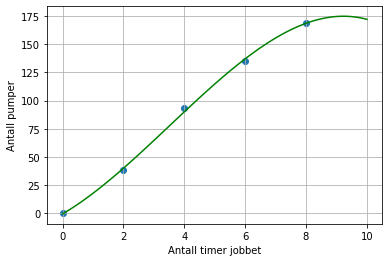

In [7]:
X = np.linspace(0, 10, 100)

plt.scatter(x, y)
plt.plot(X, np.polyval(L, X), color="g")
plt.xlabel("Antall timer jobbet")
plt.ylabel("Antall pumper")
plt.grid()
plt.show()


### Oppgave 2

En bedrift produserer en bestemt vare. Tabellen nedenfor viser sammenhengen mellom antall
produserte enheter av varen per uke og de totale kostnadene.



| Antall produserte enhet per uke, $x$ | 80 | 120  | 170   | 330   | 420   | 700    |
|:------------------:|------:|------:|------:|------:|------:|-------:|
| Totale kostnader i kroner, $K(x)$    |27 000 |31 000 | 36 500|59 000 | 74500 |137 000 |

Bestem en andregradsfunksjon $K$ som med god tilnærming kan brukes til å beregne kostnadene $K(x)$. Hva blir kostnadene i en uke der det produseres 220 enheter?



## scipy.optimize sin curve_fit

Dersom du vil bruke andre modeller enn polynomer, så må vi ty til et annet verktøy. Modulen scipy.optimize har den nyttige funksjon curve_fit. Med denne er har du så og si ubegrensede muligheter. 

### Eksempel 3

Vi antar at konsentrasjonen av CO$_2$ i lufta var 280 ppm (parts per million) i året 1800. Siden den gang har konsentrasjonen økt. Tabellen nedenfor viser utviklingen av CO$_2$–konsentrasjonen for noen utvalgte år mellom 1870 og 2000.



| År              | 1870 | 1890 | 1930 | 1950 | 1970 | 2000 |
|:---------------:|------|------|------|------|------|------|
| CO$_2$ konsentrasjon (ppm) | 285  | 287  | 295  | 305  | 325  | 365  |

Lag en modell for CO$_2$-konsentrasjonen i lufta $x$ år etter 1870. 

### Løsning:

Et spredningsdiagram vil vise at CO$_2$-konsentrasjonen ser ut til å følge en eksponentiell modell:

$$ f(x)=a \cdot b^x + c $$

Det vi gjør er å først imprtere curve_fit (linje 3 nedenfor), og så definerer modellen vi ønsker å bruke (linje 4 og 5). Vi lager da en funksjon med fire variabler (x, a, b, c). Regresjonen skal nå tilpasse a, b og c til dataene (som vi har ført unn på rad 8 og 9). 

På linje 11 har vi skrevet L, V = curve_fit(f, x, y). Dette gjør vi siden commandoen curve_fit(f, x, y) returnerer to arrayer. Vi kaller disse for L og V. L er en liste bestående av tallene a, b og c, mens V er en liste som inneholder litt statistiske data. 

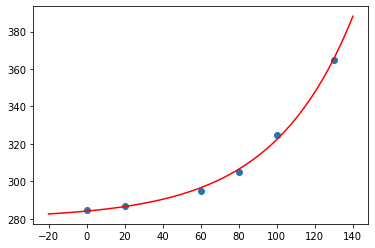

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def f(x, a, b, c):
    return a*b**x + c

x = [0, 20, 60, 80, 100, 130]      # x-verdier fra tabellen
y = [285, 287, 295, 305, 325, 365] # y-verdier fra tabellen

L, V = curve_fit(f, x, y)

X = np.linspace(-20, 140)   # x-verdier for plotting
Y = f(X, *L)                # y-verdier for plotting
plt.scatter(x, y)           # punktene fra tabellen
plt.plot(X, Y, color="r")   # Modellen vår
plt.show()

Vi ser at modellen passer bra. 

Legg merke til at vi har skrevet *L på linje 14. En stjerne foran en liste eller array vil resultere i at det er verdiene fra listen som blir plukket ut, objekt for objekt. Funksjonen f tar fire arguementer (x, a, b, c). Hadde vi skrivet f(x, L), så hadde vi bare gitt to argumenter. 

### Eksempel 4

Vi viser et eksempel for å illustere hva *L betyr.

In [12]:
L = [1, 5, "Hei", -3]  # Lager en liste med ulike verdier

print("Her er listen:", L) # Skriver ut listen

print("Her er elementene i listen:", *L) # Skriver ut elementene fra listen


Her er listen: [1, 5, 'Hei', -3]
Her er elementene i listen: 1 5 Hei -3


### Eksempel 5

Filen temp.csv inneholder data fra målinger av temperatur i et kar. (https://tork73.github.io/Data_behandling/temp.csv)

a) Last inn data fra filen og plott temperaturen som funksjon av tiden.

b) Lag en modell for temperaturen ved å bruke regresjon. Plott denne modellen i et koordinatsystem sammen med plottet fra oppgave a). 

c) Plott den deriverte til temperaturen som funksjon av tiden.

[54.83915916  0.99942834 27.72997518]


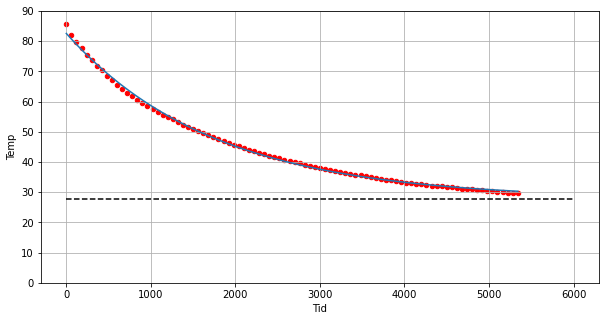

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

url = "https://tork73.github.io/Data_behandling/temp.csv"
df = pd.read_csv(url, index_col=0)

def f(x, a, b, c):
    return a*b**x + c

L, V = curve_fit(f, df["Tid"], df["Temp"])
print(L)

df.plot("Tid", "Temp", kind="scatter", color="red", figsize=(10, 5))
plt.plot(df["Tid"], f(df["Tid"], *L))
plt.hlines(L[2], 0, 6000, linestyles="dashed")
plt.ylim(0, 90)
plt.grid()
plt.show()


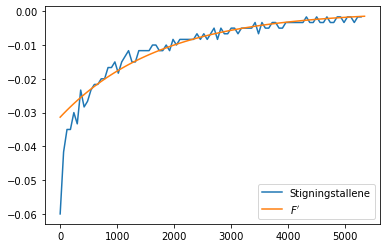

In [25]:
# Så plotter vi den deriverte av modellen og den deriverte ut fra datasettet:

D = []      # Lager en tom liste som skal bestå av de ulike stigningetallene fra datasettet
Tid = df["Tid"]   # Plukker ut tidene fra datasetet
Temp = df["Temp"] # Plukker ut temperaturene fra datasettet

for i in range(1, len(Tid)):        # Bestemmer stigningstallene i hvert delintervall
    v = (Temp[i+1]-Temp[i])/(Tid[i+1]-Tid[i])
    D.append(v)

# Lager selve funksjonen (modellen)
def F(x):
    return f(x, *L)

# Den deriverte av funksjonen
def dF(x, h=0.00001):
    return (F(x+h)-F(x))/h

# Plotter dataene: 
plt.plot(Tid[:-1], D, label="Stigningstallene")   # Plotter stigningstallene
plt.plot(Tid, dF(Tid), label=r"$F'$ ")  # Plotter den deriverte av modellen
plt.legend()
plt.show()

### Oppgave 3

Temperaturen i en kopp kaffe blir målt hvert fjerde minutt. Resultatene av
  målingene er vist i tabellen nedenfor.
  


| Tid  | 0  | 4  | 8  | 12 | 16 |
|------|----|----|----|----|----|  
| Temp | 70 | 53 | 42 | 35 | 30 |

Lag et spredningsdiagram av tallene i tabellen og bestem en modell som passer med tallen. 

Hva er temperaturen i koppen etter 20 minutter ifølge modellen du laget? 

Hvor lang tid går det før temperaturen er 25 grader ifølge modellen? 